In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("./Train.csv")
y = pd.read_csv("./Train.csv")
X = X.values
y = y.values
X = X[:,:-1]
y = y[:,-1]

In [3]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [4]:
u = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X-u)/std

In [5]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
m = X.shape[0]

In [6]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m

def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    m = X.shape[0]
    return grad/m

def gradDescent(X,y,learning_rate=0.1, max_epochs=300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
            
    return theta,error_list

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    den = np.sum((y-y.mean())**2)
    score = (1 - num/den)
    return score*100

In [7]:
theta,error_list = gradDescent(X,y)

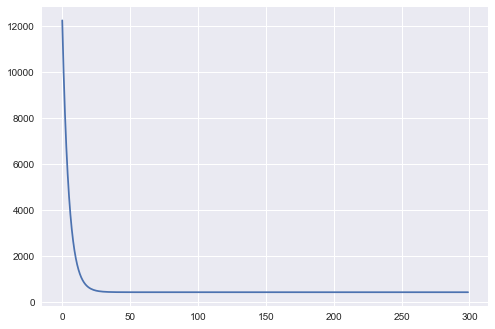

In [8]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

In [9]:
y_ = hypothesis(X,theta)
r2_score(y,y_)

96.60939669975616

In [11]:
X_test = pd.read_csv("./Test.csv")
X_test = X_test.values
X_test.shape,X.shape

((400, 5), (1600, 6))

In [12]:
X_test = (X_test- u)/std
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones, X_test))

In [14]:
Y_ = hypothesis(X_test,theta)
ones = np.ones((Y_.shape[0],1),dtype='int64')
j = 0
for i in range(ones.shape[0]):
    ones[i][0] = j
    j += 1
Y_.shape

(400,)

In [16]:
Y_ = Y_.reshape((400,1))
Y_.shape

(400, 1)

In [18]:
Y_ = np.hstack((ones,Y_))
df = pd.DataFrame(Y_)
df.head()

,0,1
0,0.0,114.583689
1,1.0,118.012815
2,2.0,-21.739852
3,3.0,-43.936899
4,4.0,-95.914898


In [19]:
df = pd.DataFrame(Y_, columns=['id','target'])
df.to_csv('predictions.csv',index=False)